# Exploratory Data Analysis
This lesson is going to walkthrough the diamonds dataset and illustrate some best practices for Exploratory Data Analysis (EDA). This notebook is based off of the EDA chapter in [R for Data Science](https://r4ds.had.co.nz/exploratory-data-analysis.html#questions) book by Hadley Wickham plus some remarks of my own. I refer you to that chapter for full details - since that book only has examples in the R language, we've Pythonised them here for you.

## What is Exploratory Data Analysis?
Quote dumping from the chapter: 

```
(EDA is the process of using)... visualisation and transformation to explore your data in a systematic way ... EDA is an iterative cycle. You:

Generate questions about your data.

Search for answers by visualising, transforming, and modelling your data.

Use what you learn to refine your questions and/or generate new questions.

EDA is not a formal process with a strict set of rules. More than anything, EDA is a state of mind. During the initial phases of EDA you should feel free to investigate every idea that occurs to you. Some of these ideas will pan out, and some will be dead ends. As your exploration continues, you will home in on a few particularly productive areas that you’ll eventually write up and communicate to others.

EDA is an important part of any data analysis, even if the questions are handed to you on a platter, because you always need to investigate the quality of your data. Data cleaning is just one application of EDA: you ask questions about whether your data meets your expectations or not. To do data cleaning, you’ll need to deploy all the tools of EDA: visualisation, transformation, and modelling.

```


# Continuous vs Categorical Variables

# Generating Questions

The goal of EDA is to develop an understanding of the data. We do this by generating a large quantity of questions to ask about our data. As we answer our questions, new questions will arise which will be more particular and relevant to our dataset. As Hadley Wickham says:

```
There is no rule about which questions you should ask to guide your research. However, two types of questions will always be useful for making discoveries within your data. You can loosely word these questions as:

What type of variation occurs within my variables?

What type of covariation occurs between my variables?
```

# Variation
Variation is the tendency of the values of a variable to change from measurement to measurement.
Every variable has its own pattern of variation, which can reveal interesting information. The best way to understand that pattern is to visualise the distribution of the variable’s values.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


plt.style.use('classic')
%matplotlib inline
sns.set()

In [2]:
# Read in Diamonds Data
diamonds = pd.read_csv("../data/diamonds.csv")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# About the diamonds dataset
This dataset contains information about 53,940 round-cut diamonds. How do we know? Each row of data represents a different diamond and there are 53,940 rows of data (see help page, ?diamonds)

There are 10 variables measuring various pieces of information about the diamonds.

There are 3 categorical variables: cut, color, & clarity. For example, there are 5 categories of diamond cuts with “Fair” being the lowest grade of cut to ideal being the highest grade.

There are 6 variables that are of numeric structure: carat, depth, table, x, y, z

There is 1 variable that has an integer structure: price

1. price:	price in US dollars	$326-$18,823
2. carat:	weight of the diamond	0.2-5.01
3. cut:	quality of the cut	Fair, Good, Very Good, Premium, Ideal
4. color:	diamond color	J (worst) to D (best)
5. clarity:	measurement of how clear the diamond is	I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)
6. x:	length in mm	0-10.74
7. y:	width in mm	0-58.9
8. z:	depth in mm	0-31.8
9. depth:	total depth percentage	43-79
10. table:	width of top of diamond relative to widest point	43-95


In [15]:
diamonds_count = diamonds.groupby(by = ['cut'], as_index=False).agg({'carat':'count'})
diamonds_count = diamonds_count.rename(columns = {'carat':'count'})
diamonds_count

,cut,count
0,Fair,1610
1,Good,4906
2,Ideal,21551
3,Premium,13791
4,Very Good,12082


<AxesSubplot:xlabel='cut', ylabel='count'>

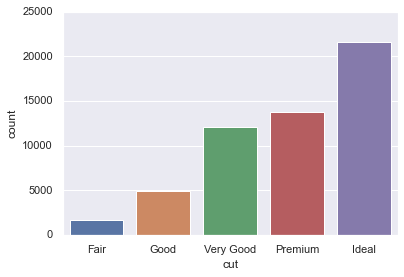

In [18]:
# For categorical variables, barplots can be a good way to get a sense of the data
sns.barplot(x = 'cut', y = 'count', data= diamonds_count, order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])

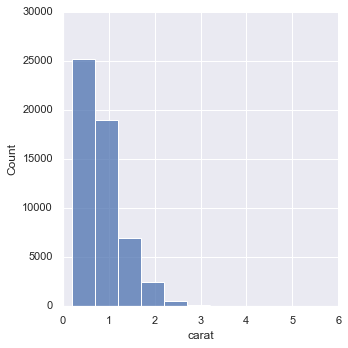

In [19]:
sns.displot(diamonds['carat'], binwidth = 0.5, kde = False )

In [21]:
# Our plot looks streched because there are some diamonds with very high carats (outliers)
diamonds['carat'].describe()

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

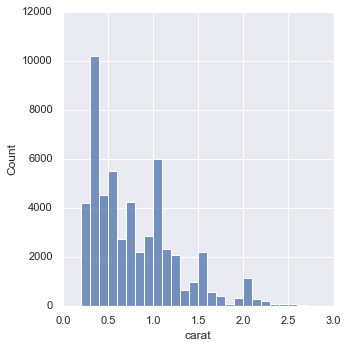

In [3]:
# Let's select diamonds with carat less than 3 and view the distribution
smaller = diamonds[diamonds.carat < 3]

sns.displot(smaller['carat'], binwidth = 0.1, kde = False )

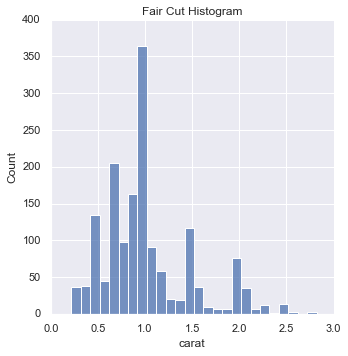

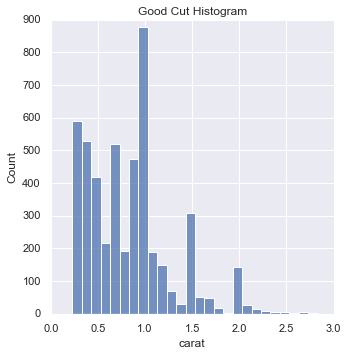

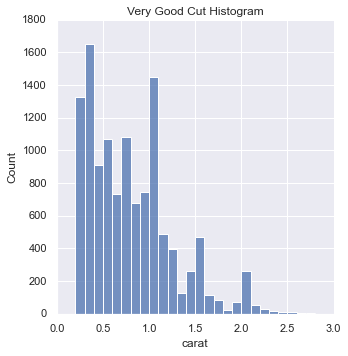

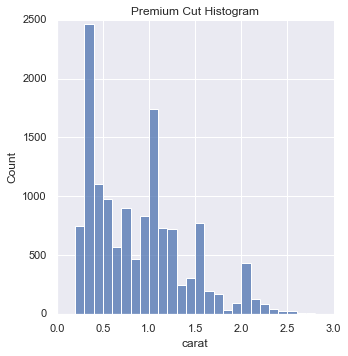

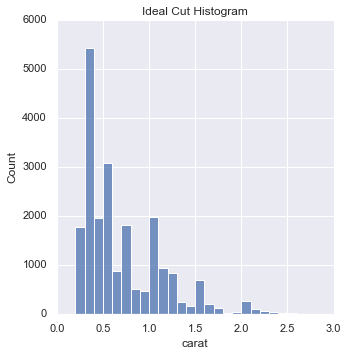

In [9]:
# Look at carat Histogram by diamond cut
for key, value in enumerate(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']):
    smaller_cut = smaller[smaller.cut == value]
    sns.displot(smaller_cut['carat'], binwidth = 0.1, kde = False )
    plt.title(value + ' Cut Histogram')

# EDA Checklist
These are some questions to ask yourself as you approach a new dataset. This list isn't exhaustive but can be a useful guide for you to ask your own questions.

1. How is my data distributed (Continuous Variables)? This is best discovered by looking at the quantiles of the distributions returned by the `describe` method.

2. What are the most frequent/ typical values in my dataset? Are these what I would expect to see?

3. What are the extreme values/ outliers in my data? What could be the reason these values are present? How many of them are there and does this change by variable? Does my analysis change much with or without these values?

4. Are there any missing values or incorrect values? What could be causing them?

5. Are there any natural groupings in my data? If so, how does my data differ between these groupings?

6. Of the key variables of interest in my data, what is the strength of associations between them?

7. Is my data properly scaled so I can compare like with like?

8. Could key variables in my dataset be systematically related? Could I model this relationship?